<a href="https://colab.research.google.com/github/DanKis52/ml_course/blob/main/ml_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Описание задачи**
Датасет представляет собой опрос авиапассажиров касательно их удовлетворённости авиаперелетом. Необходимо по имеющимся признакам определить, будет ли авиапассажир удовлетворён полётом.


### **Признаки**

**Датасет содержит признаки со следующими именами:**

* *Gender*: Пол пассажира (мужской или женский)

* *Customer* Type: Тип клиента (лояльный или нелояльный)

* *Age*: Возраст пассажира

* *Type of Travel*: Цель полета пассажира (личная или деловая поездка)

* *Class*: Класс обслуживания пассажира (Эконом, Эконом-Плюс, Бизнес)

* *Flight distance*: Расстояние полёта (км)

* *Inflight wifi service*: Уровень удовлетворенности пассажира услугами Wi-Fi на борту (0-5)

* *Departure/Arrival time convenient*: Уровень удовлетворенности пассажира удобностью времени отправления/прибытия (0-5)

* *Ease of Online booking*: Уровень удовлетворенности пассажира онлайн-бронированием (0-5)

* *Gate location*: Уровень удовлетворенности пассажира расположением "гейта" (0-5)

* *Food and drink*: Уровень удовлетворенности пассажира едой и напитками (0-5)

* *Online boarding*: Уровень удовлетворенности пассажира онлайн регистрацией на рейс (0-5)

* *Seat comfort*: Уровень удовлетворенности пассажира комфортом сиденья (0-5)

* *Inflight entertainment*: Уровень удовлетворенности пассажира развлечениями в самолёте (0-5)

* *On-board service*: Уровень удовлетворенности пассажира обслуживанием в самолёте (0-5)

* *Leg room service*: Уровень удовлетворенности пассажира пространством для ног в самолёте (0-5)

* *Baggage handling*: Уровень удовлетворенности пассажира выдачей багажа (0-5)

* *Check-in service*: Уровень удовлетворенности пассажира процессом регистрации (0-5)

* *Inflight service*: Уровень удовлетворенности пассажира обслуживанием на протяжении полёта (0-5)

* *Cleanliness*: Уровень удовлетворенности пассажира чистотой (0-5)

* *Departure Delay in Minutes*: Задержка вылета в минутах

* *Arrival Delay in Minutes*: Задержка прибытия в минутах

* *Satisfaction*: Уровень удовлетворенности пассажира полётом (удовлетворён либо нейтрально или неудовлетворён)

# **2. Анализ датасета**

In [315]:
# подключение библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
# загрузка датасета

data_train = pd.read_csv("/content/drive/MyDrive/ml_course/train.csv")
data_test = pd.read_csv("/content/drive/MyDrive/ml_course/test.csv")
print("Объем данных обучающей и тестовой выборки: ", data_train.shape, data_test.shape)

Объем данных обучающей и тестовой выборки:  (103904, 25) (25976, 25)


In [237]:
data_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [238]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Первые 2 столбца бесполезны, удаляем их

Столбцы с индексами 0, 1, 3, 4, 6-19 содержат категориальные признаки

In [239]:
data_train = data_train.drop(data_train.iloc[:,[0, 1]], axis = 1)  # удаляем первые два столбца
cat_i = [0, 1, 3, 4]  # выделим столбцы с категориальными значениями
data_train[data_train.columns[cat_i]] = data_train[data_train.columns[cat_i]].astype('category')  # изменяем тип значений
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  int64   
 7   Departure/Arrival time convenient  103904 non-null  int64   
 8   Ease of Online booking             103904 non-null  int64   
 9   Gate location                      103904 non-null  int64   
 10  Food and drink                     103904 non-null  int64   
 11  Online boarding           

Проверим наличие пропущенных значений

In [240]:
data_train.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

В столбце *Arrival Delay in Minutes* имеется 310 пропущенных значений, что составляет примерно 0.3% от всей выборки. Данные значения можем удалить.

In [241]:
data_train = data_train.dropna()  # удаляем 310 строк с пропущенными значениями

Информация о числовых признаках:

In [242]:
data_train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [243]:
data_train.quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0.005,7.0,86.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000
0.010,8.0,101.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000
0.050,14.0,175.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000
0.100,20.0,236.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,0.0,0.000
0.500,40.0,842.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0.0,0.000
0.900,59.0,2751.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,44.0,44.000
0.950,64.0,3384.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,77.0,79.000
0.990,70.0,3882.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,181.0,184.000
0.995,72.0,3943.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,233.0,238.035


Информация о категориальных признаках:

In [244]:
data_train.describe(include=['category'])

,Gender,Customer Type,Type of Travel,Class
count,103594,103594,103594,103594
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,52576,84662,71465,49533


**Визуализация**

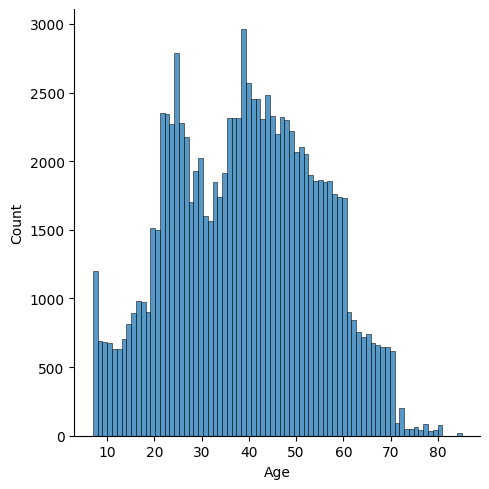

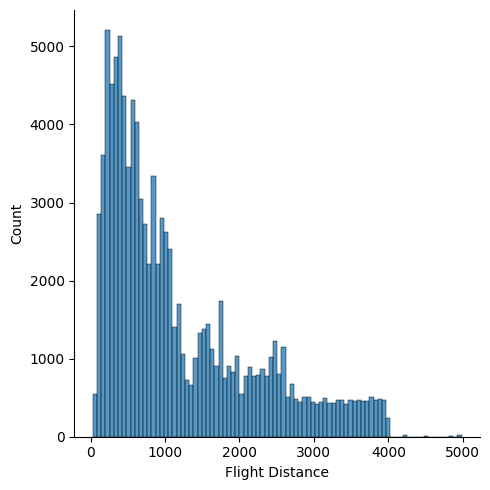

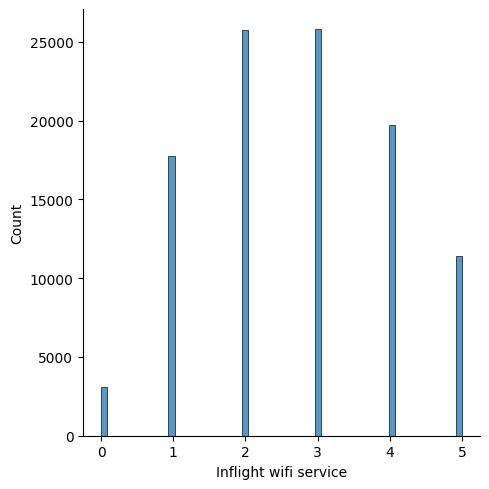

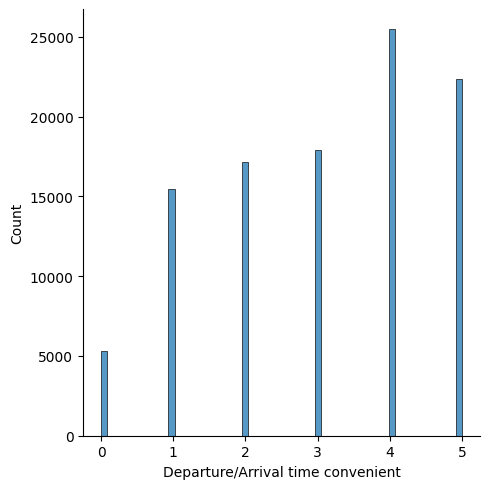

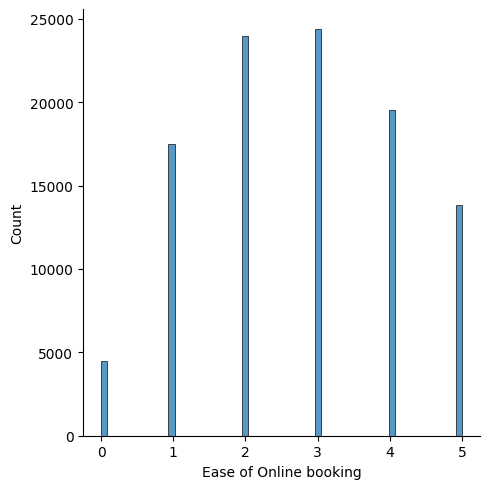

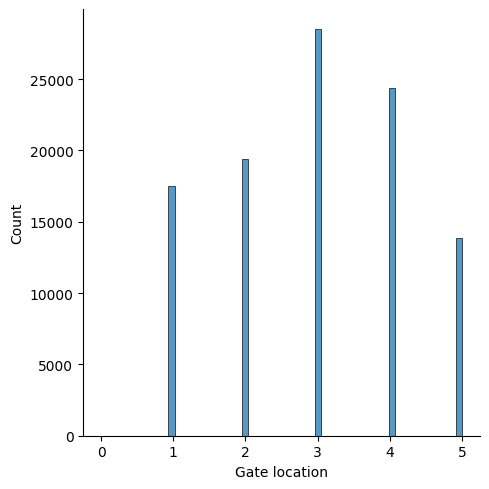

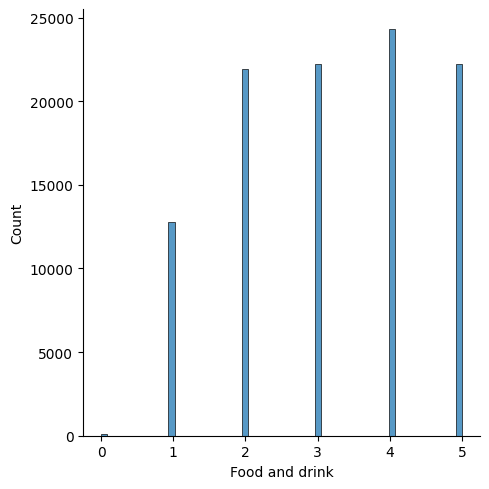

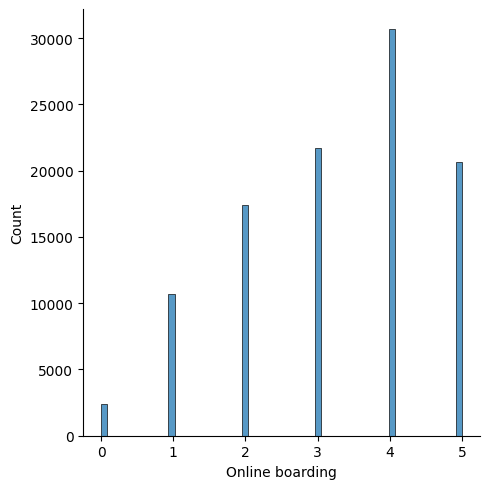

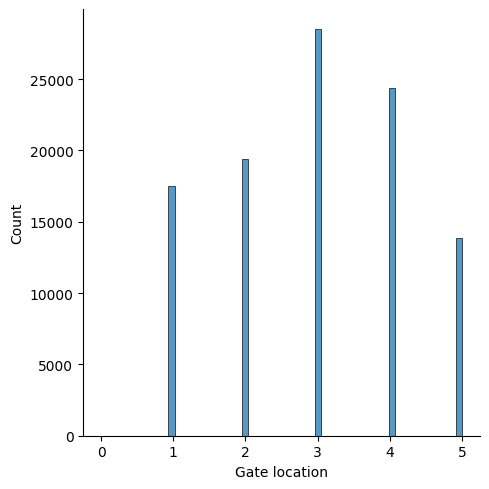

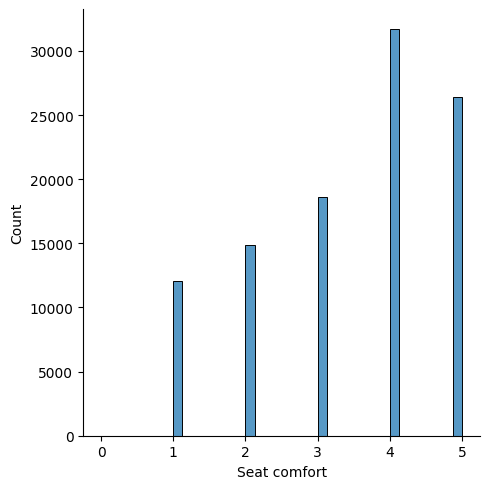

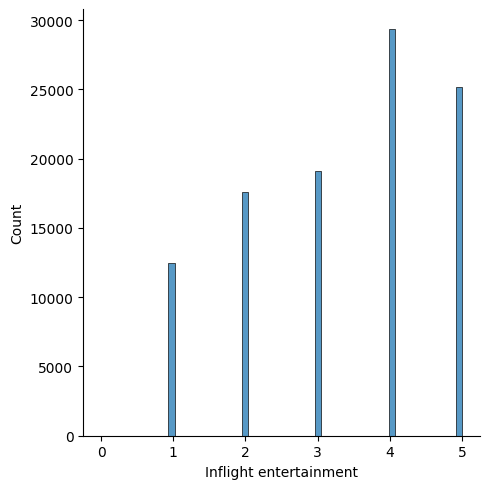

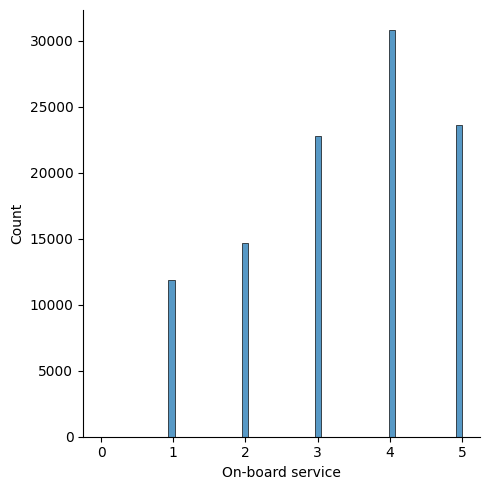

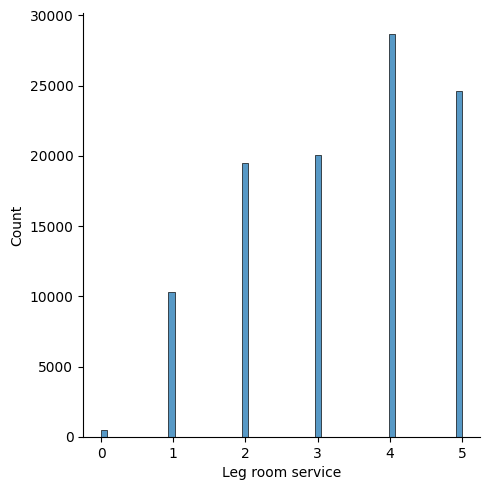

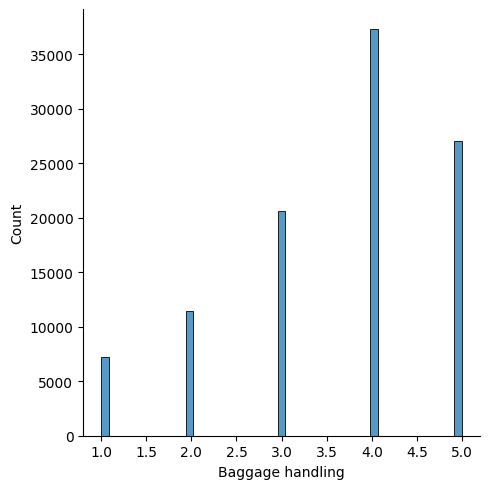

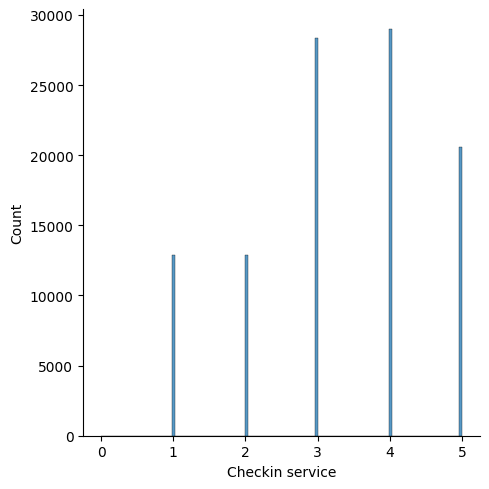

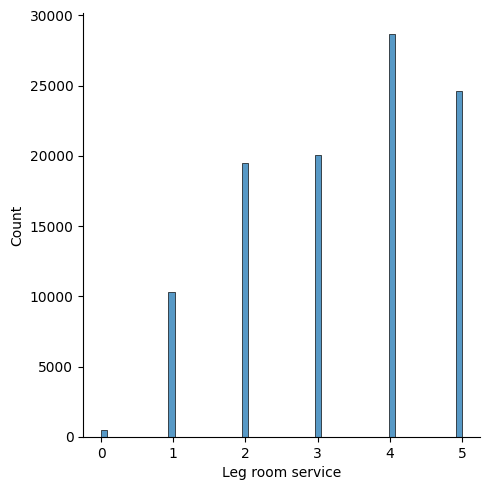

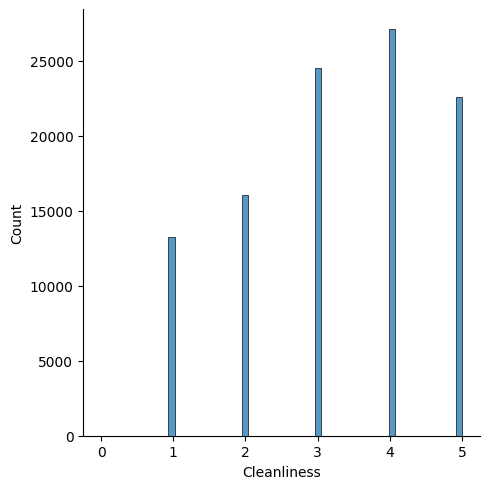

In [245]:
ind = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Gate location',
       'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Leg room service', 'Cleanliness']
for i in range(len(ind)):
  sns.displot(data_train[ind[i]])
  plt.show()

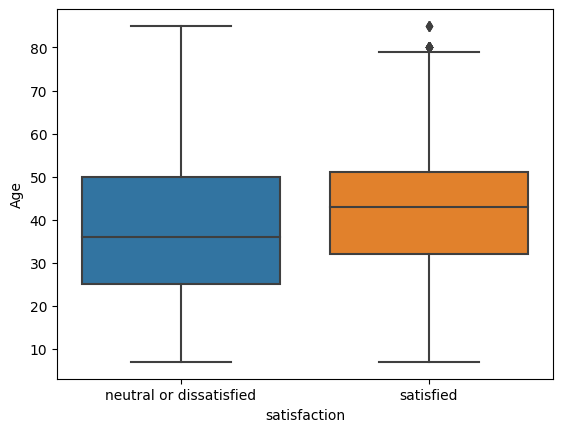

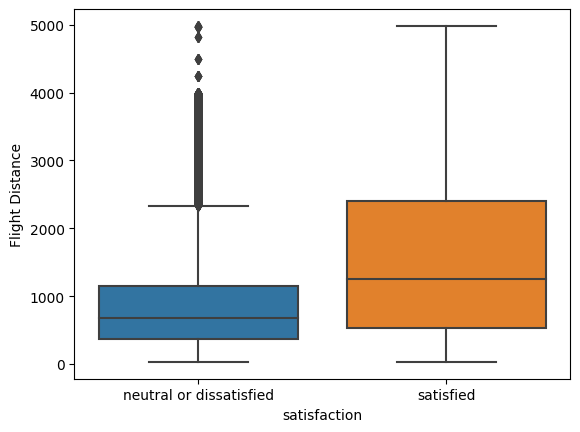

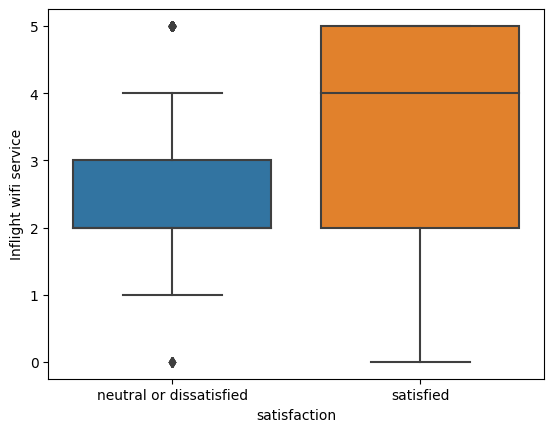

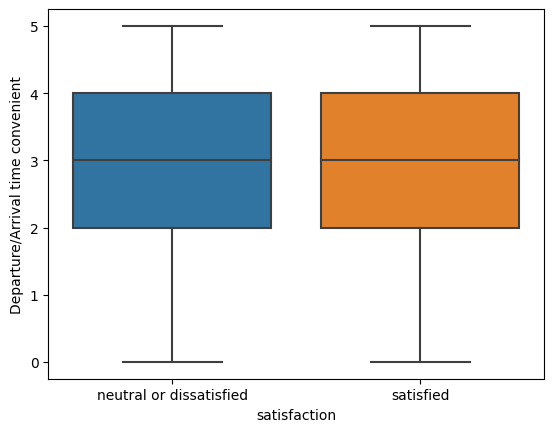

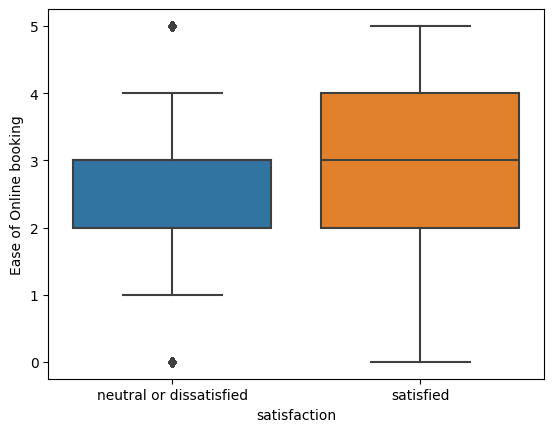

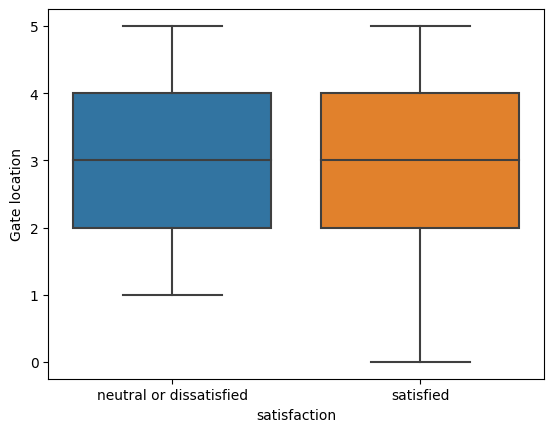

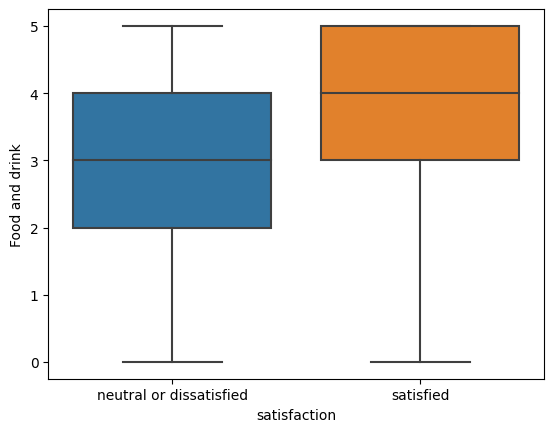

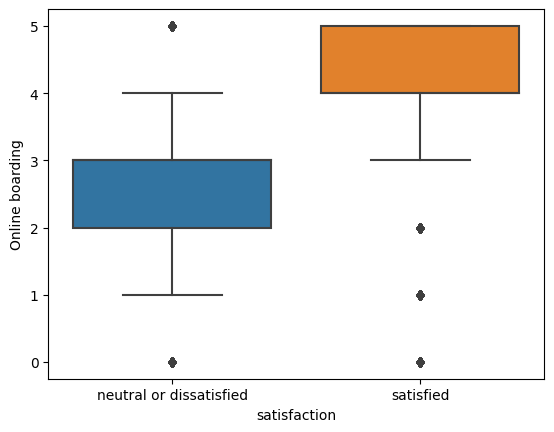

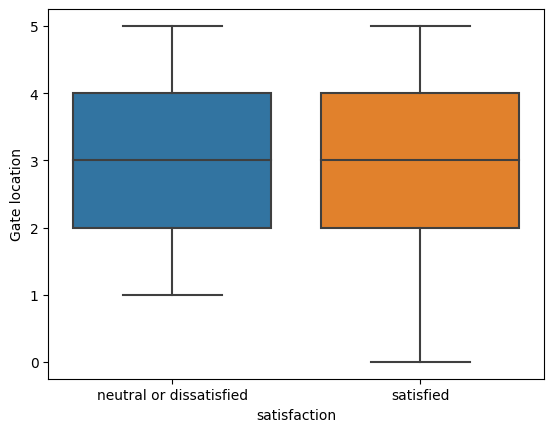

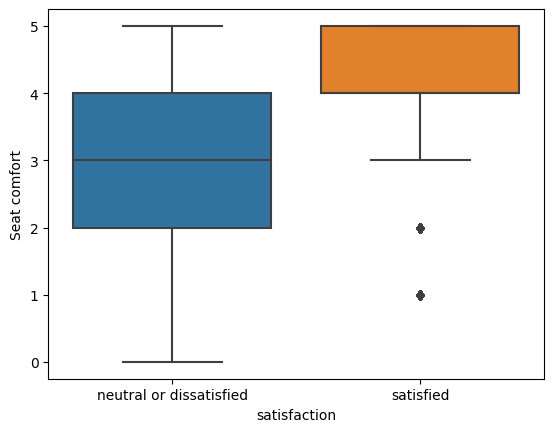

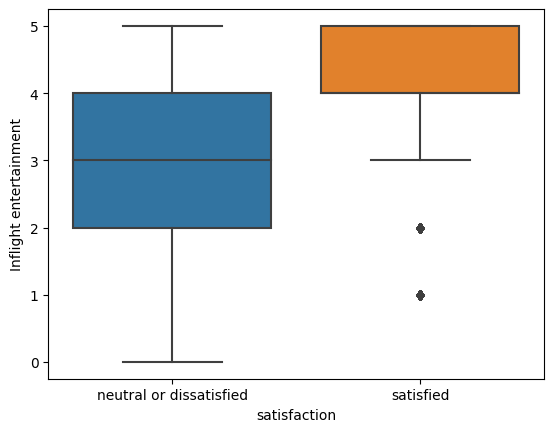

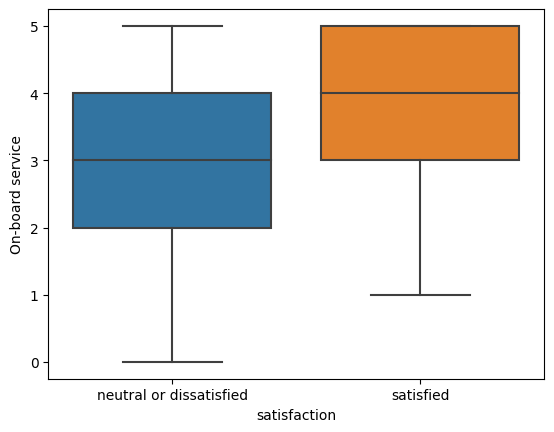

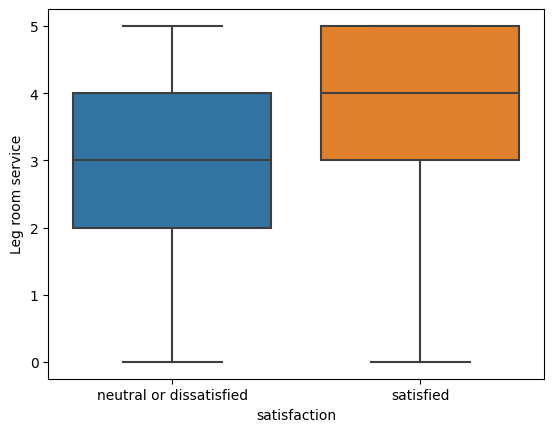

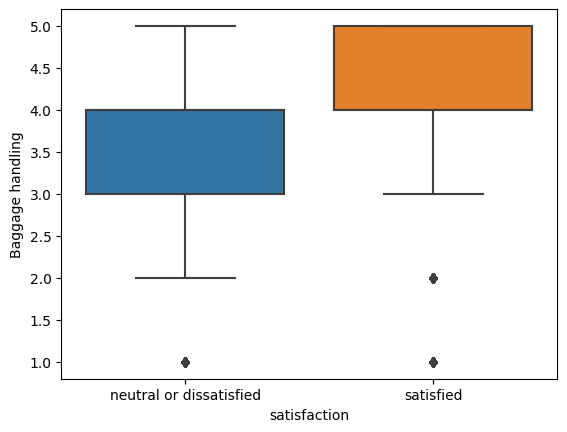

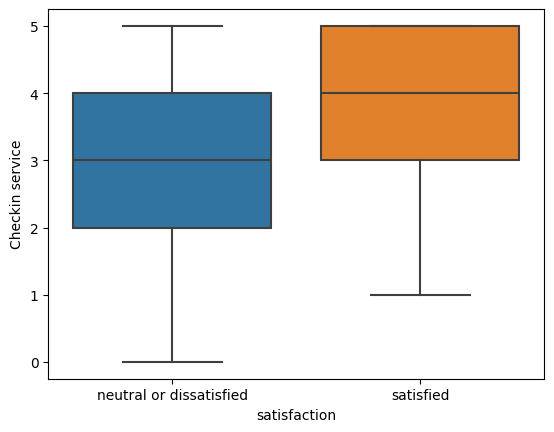

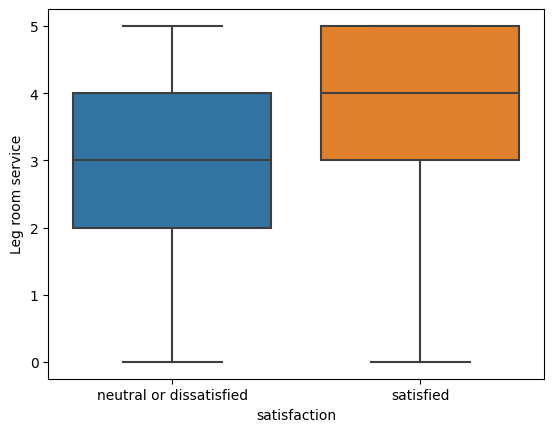

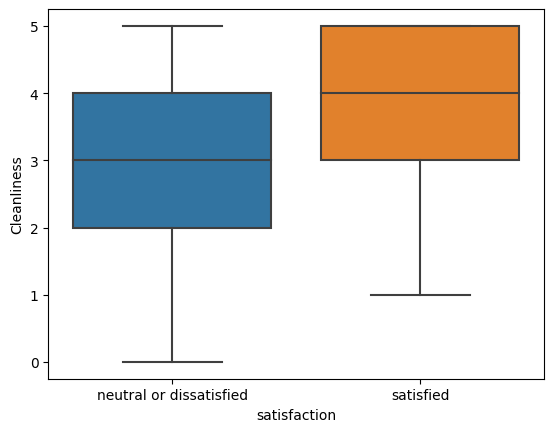

In [246]:
for i in range(len(ind)):
  sns.boxplot(x="satisfaction", y=ind[i], data=data_train)
  plt.show()

Text(0.5, 1.0, 'Correlation between features')

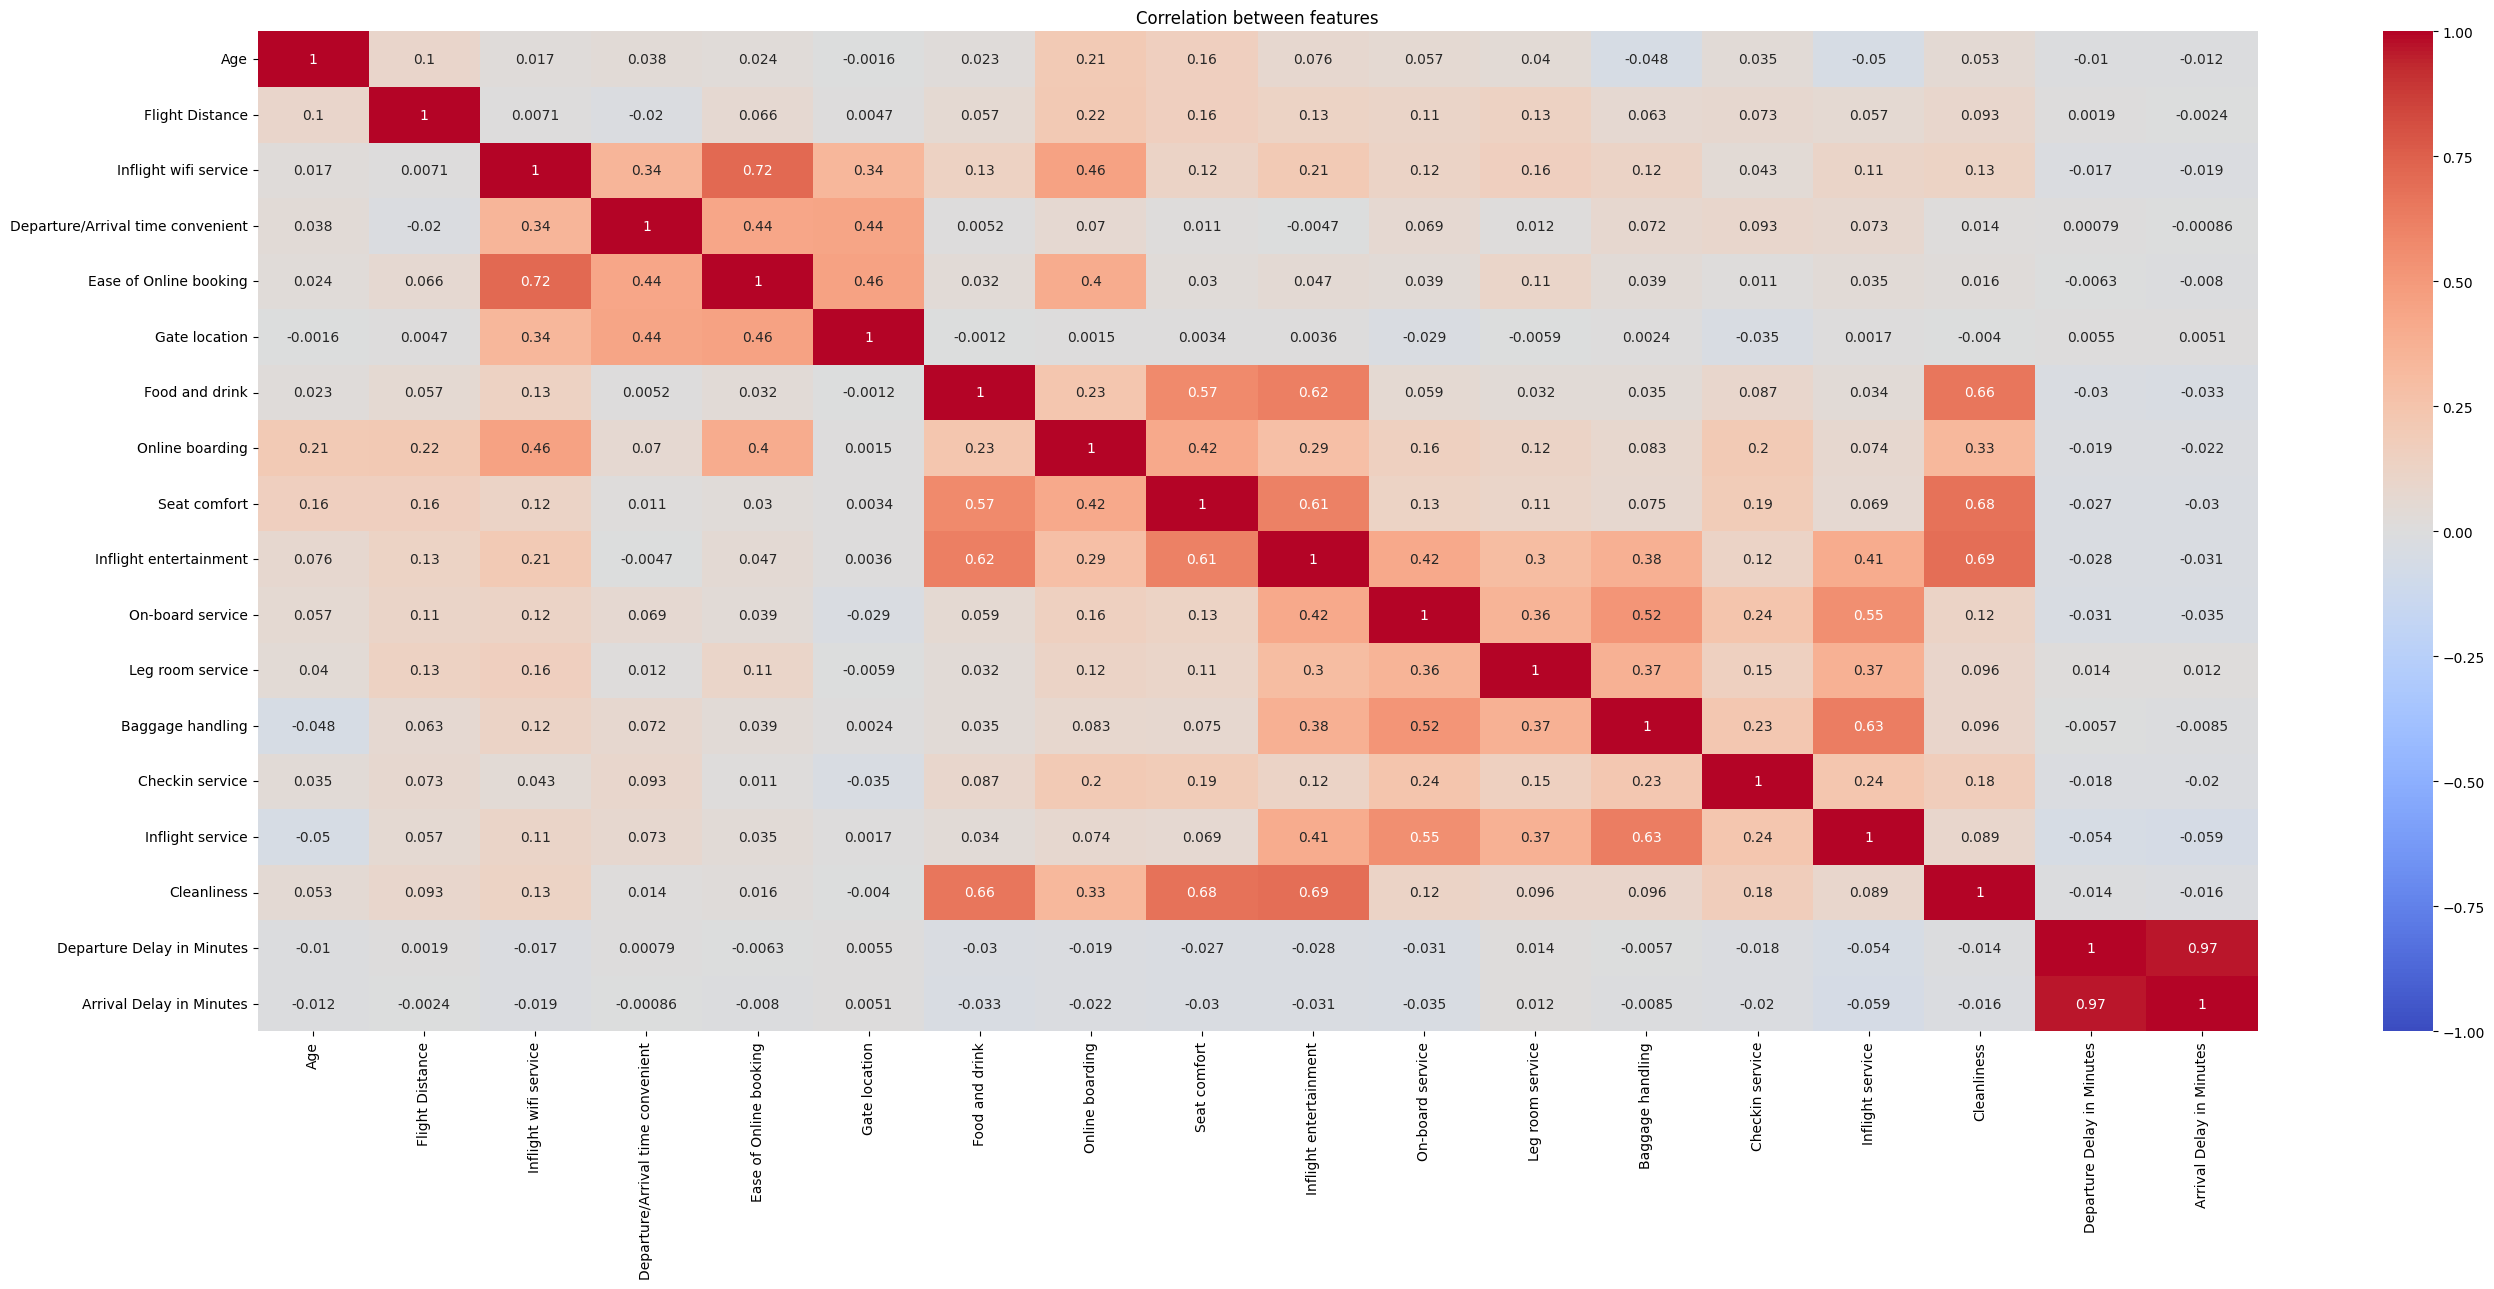

In [247]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])
sns.heatmap(data_train.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Correlation between features')

По матрице корреляции можно сказать следующее:

* Признак Inflight wifi service коррелирует с признаками Ease of Online booking и Online boarding. Эту корреляцию можно объяснить тем, что если человек пользуется онлайн-бронирование и/или онлайн-посадкой, то этот человек активно пользуется интернетом и поэтому ему также важен стабильный и качественный Wi-Fi на борту самолёта

* Признак Departure/Arrival time convenient коррелирует с признаками Ease of Online booking и Gate location. Эту корреляцию можно объяснить тем, что человек при онлайн-бронировании сам выбирает удобное для себя время отправления и прибытия

* Признак Food and drink коррелирует с признаками Seat comfort, Inflight service и Cleanliness. Это очевидные связи, так как понятно, что удовлетворённость едой и напитками связана с удовлетворённостью обслуживания на протяжении полёта

* Признак Online boarding кроме тех признаков, что были выше, также коррелирует с признаком Seat comfort. Эту корреляцию можно объяснить тем, что при онлайн-посадке человек сам может выбрать удобное ему место

* Признак Seat comfort кроме тех признаков, что были выше, также коррелирует с признаками Inflight entertainment и Cleanliness. Эту корреляцию можно объяснить тем, что от расположение места может зависеть чистота и некоторые развлечения на борту

* Признак Inflight entertainment кроме тех признаков, что были выше, также коррелирует с признаком Cleanliness

* Признак On-board service коррелирует с признаками Baggage handling и Inflight service

* Признак Baggage handling кроме тех признаков, что были выше, также коррелирует с признаком Inflight service

* Признак Departure Delay in Minutes очень сильно коррелирует с признаком Arrival Delay in Minutes. Это очевидная связь, так как если самолёт задержался с вылетом, то он и задержится с прилётом.

* После рассмотрения матрицы корреляции, можно удалить один признак из пары сильно коррелирующих признаков для того, чтобы уменьшить кол-во рассматриваемых признаков. То есть из пары Departure Delay in Minutes и Arrival Delay in Minutes можно удалить, например, признак Arrival Delay in Minutes.

In [248]:
data_train.drop("Arrival Delay in Minutes", axis =1, inplace= True)

Из описания и графиков мы видим следующее:

* Возраст

  Минимальный возраст пассажира: 7 лет

  Средний возраст пассажира: 39 лет

  Максимальный возраст пассажира: 85 лет

  Из графика можно сказать, что существует "яма" по количеству пассажиров, которым больше 27 лет и меньше 36

* Дальность полёта

  Минимальное расстояние: 31 км

  Среднее расстояние: 1189 км

  Максимальное расстояние: 4983 км

  Из графика и описания видно, что большее кол-во перелётов на расстояние меньше 1000 км

* Задержка вылета

  Среднее время: 15 мин

  Максимальное время: 1592 мин

  При этом, верхний квартиль равняется всего 12 минутам, а квантиль 95% - 44 минуты. Значит, ситуация, соответствующая максимальному значению, это какой-то необычный случай

* Задержка прибытия

  Среднее время: 15 мин

  Максимальное время: 1584 мин

  При этом, верхний квартиль равняется всего 13 минутам, а квантиль 95% - 44 минуты. Значит, ситуация, соответствующая максимальному значению, это какой-то необычный случай

* Оценки критериев

  Среднее значение всех оценок около 3

* Пол пассажира

  В датасете представитей одного и другого пола примерно поровну

* Тип клиента

  В датасете гораздо больше постоянных пассажиров, нежели непостоянных

* Цель полёта пассажира

  В датасете гораздо больше пассажиров, у которых бизнес-поездка, нежели тех, у которых обычная поездка

* Класс обслуживания пассажира

  В датасете самый большой по кол-ву пассажиров класс - это бизнес-класс. Причём представителей Эконом-Плюс класса гораздо меньше, чем остальных

* Уровень удовлетворенности пассажира авиакомпанией

  В датасете соотношение представителей одного и друго класса примерно 56%/44%

# **3. Бинаризация номинальных признаков**

Бинарные признаки Gender, Customer Type, Type of Travel, satisfaction заменим на числовые

К категориальному (небинарному) признаку Class применим метод бинаризации (one-hot encoding)

In [249]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(data_train[['Gender', 'Type of Travel', 'Customer Type', 'Class', 'satisfaction']])
dummies = pd.DataFrame(enc.transform(data_train[['Gender', 'Type of Travel', 'Customer Type', 'Class', 'satisfaction']]),
                       columns=enc.get_feature_names_out(), index=data_train.index)
dummies.head()

,Gender_Male,Type of Travel_Personal Travel,Customer Type_disloyal Customer,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [250]:
data_train = pd.concat((data_train, dummies), axis=1).drop(['Gender', 'Type of Travel', 'Customer Type', 'Class', 'satisfaction'], axis=1)


#  **4. Нормализация**

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать. Из всех доступных способов нормализации выберем способ стандартизации. Но в задаче классификации нам не нужно трогать тот признак, который мы хотим предсказать.

In [251]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_train)
tmp = data_train['satisfaction_satisfied']
df_train = pd.DataFrame(scaler.transform(data_train), columns=data_train.columns, index=data_train.index)
df_train['satisfaction_satisfied'] = tmp
df_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Customer Type_disloyal Customer,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,-1.745542,-0.731305,0.203521,0.616249,0.173716,-1.547312,1.352401,-0.185632,1.182991,1.231530,...,1.156211,1.305913,0.268966,1.015154,1.491414,-0.472883,-0.957206,-0.904105,3.587718,0.0
1,-0.951526,-0.956916,0.203521,-0.695032,0.173716,0.017981,-1.656487,-0.185632,-1.849863,-1.769166,...,0.305580,-1.742432,-0.360682,1.015154,-0.670505,2.114687,1.044708,-0.904105,-0.278729,0.0
2,-0.885358,-0.047454,-0.549571,-0.695032,-0.541118,-0.764666,1.352401,1.296479,1.182991,1.231530,...,0.305580,1.305913,-0.386917,-0.985072,-0.670505,-0.472883,1.044708,-0.904105,-0.278729,1.0
3,-0.951526,-0.629028,-0.549571,1.271890,1.603383,1.583273,-0.904265,-0.926688,-1.091649,-1.018992,...,0.305580,-0.980345,-0.098328,-0.985072,-0.670505,-0.472883,1.044708,-0.904105,-0.278729,0.0
4,1.430521,-0.977973,0.203521,-0.039391,0.173716,0.017981,0.600179,1.296479,1.182991,-0.268818,...,-0.545051,-0.218259,-0.386917,1.015154,-0.670505,-0.472883,1.044708,-0.904105,-0.278729,1.0


# **5. Обучающая и тестовая выборки**

In [252]:
X_train = df_train.drop(['satisfaction_satisfied'], axis = 1)
y_train = df_train['satisfaction_satisfied']

In [253]:
data_test.head()
data_test['Gender'] = data_test['Gender'].astype('category')
data_test['Type of Travel'] = data_test['Type of Travel'].astype('category')
data_test['Customer Type'] = data_test['Customer Type'].astype('category')
data_test['Class'] = data_test['Class'].astype('category')
data_test['satisfaction'] = data_test['satisfaction'].astype('category')
data_test = data_test.dropna()
data_test.drop("Unnamed: 0", axis =1, inplace= True)
data_test.drop("Arrival Delay in Minutes", axis =1, inplace= True)

In [254]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(data_test[['Gender', 'Type of Travel', 'Customer Type', 'Class', 'satisfaction']])

OneHotEncoder(drop='if_binary', sparse=False, sparse_output=False)

In [255]:
dummies = pd.DataFrame(enc.transform(data_test[['Gender', 'Type of Travel', 'Customer Type', 'Class', 'satisfaction']]),
                       columns=enc.get_feature_names_out(), index=data_test.index)

In [256]:
df_test = pd.concat((data_test, dummies), axis=1).drop(['Gender', 'Type of Travel', 'Customer Type', 'Class', 'satisfaction'], axis=1)

In [257]:
scaler = StandardScaler()
scaler.fit(df_test)
tmp = df_test['satisfaction_satisfied']
df_test = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns, index=df_test.index)
df_test['satisfaction_satisfied'] = tmp

In [258]:
df_test.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Customer Type_disloyal Customer,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,-1.209029,0.817898,-1.035195,1.705489,0.622058,0.172743,0.798634,-0.161369,0.544741,-0.340006,...,1.144456,1.299508,0.962074,-0.986154,-0.6634,-0.475938,-0.962879,1.116636,-0.282365,1.0
1,0.665145,-0.239329,1.671574,-1.291472,-1.334964,0.172743,-1.542123,1.340280,0.544741,1.174883,...,0.297449,1.299508,-0.382547,-0.986154,-0.6634,-0.475938,1.038552,-0.895547,-0.282365,1.0
2,-1.400384,-1.296556,-1.003150,-0.542232,-1.987305,-0.535209,0.798634,-0.912194,-0.930752,-1.097451,...,-1.396566,-0.974375,-0.382547,1.014041,-0.6634,2.101114,-0.962879,1.116636,-0.282365,0.0
3,0.344021,0.289285,2.186291,-2.040712,-1.987305,-1.951113,-0.761871,-0.161369,0.544741,0.417438,...,-2.243573,0.541547,-0.382547,1.014041,-0.6634,-0.475938,1.038552,-0.895547,-0.282365,1.0
4,-0.748483,0.619668,-0.011770,-0.542232,-0.030283,0.880696,0.018382,0.589455,-1.668499,-1.097451,...,-1.396566,0.541547,-0.382547,-0.986154,-0.6634,-0.475938,-0.962879,1.116636,-0.282365,1.0


In [259]:
X_test = df_test.drop(['id', 'satisfaction_satisfied'], axis = 1)
y_test = df_test['satisfaction_satisfied']

# **6. Обучение модели**

## **6.1 Метод k ближайших соседей**

In [260]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [261]:
res_table = pd.DataFrame(columns=["Model","Accuracy"])

In [262]:
from sklearn.metrics import accuracy_score
y_test_predict = knn.predict(X_test)
err_test = accuracy_score(y_test, y_test_predict)
res_table.loc[len(res_table)] = ('KNeighborsClassifier standart', err_test)

In [263]:
res_table

,Model,Accuracy
0,KNeighborsClassifier standart,0.928127


Увеличим количество рассматриваемых соседей до 7

In [264]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [265]:
y_test_predict = knn_7.predict(X_test)
err_test = accuracy_score(y_test, y_test_predict)
res_table.loc[len(res_table)] = ('KNeighborsClassifier n=7', err_test)

In [266]:
res_table

,Model,Accuracy
0,KNeighborsClassifier standart,0.928127
1,KNeighborsClassifier n=7,0.929093


Увеличим количество рассматриваемых соседей до 11

In [267]:
knn_11 = KNeighborsClassifier(n_neighbors=11)
knn_11.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [268]:
y_test_predict = knn_11.predict(X_test)
err_test = accuracy_score(y_test, y_test_predict)
res_table.loc[len(res_table)] = ('KNeighborsClassifier n=11', err_test)

In [269]:
res_table

,Model,Accuracy
0,KNeighborsClassifier standart,0.928127
1,KNeighborsClassifier n=7,0.929093
2,KNeighborsClassifier n=11,0.928784


## **6.2 Логистическая регрессия**

In [270]:
from sklearn.linear_model import LogisticRegression
logist = LogisticRegression()
logist.fit(X_train, y_train)

LogisticRegression()

In [271]:
y_test_predict = logist.predict(X_test)
err_test = accuracy_score(y_test, y_test_predict)
res_table.loc[len(res_table)] = ('LogisticRegression standart', err_test)

Посмотрим, на какие признакам модель обращает большее внимание

In [272]:
coef = pd.DataFrame(logist.coef_).T
coef["abs"] = coef[0].abs()

coef.set_index(X_test.columns).sort_values(by = "abs", ascending = False)

,0,abs
Type of Travel_Personal Travel,-1.255800,1.255800
Online boarding,0.825814,0.825814
Customer Type_disloyal Customer,-0.783973,0.783973
Inflight wifi service,0.524499,0.524499
Checkin service,0.408060,0.408060
On-board service,0.388079,0.388079
Leg room service,0.332014,0.332014
Cleanliness,0.291130,0.291130
Class_Business,0.213406,0.213406
Ease of Online booking,-0.200191,0.200191


Соответственно, топ 5 признаков, на которые модель обращает большее внимание (модуль значения), выглядит так:

1. Цель полета пассажира
2. Уровень удовлетворенности пассажира онлайн-посадкой
3. Тип клиента
4. Уровень удовлетворенности пассажира услугами Wi-Fi на борту
5. Уровень удовлетворенности пассажира процессом регистрации

In [273]:
res_table

,Model,Accuracy
0,KNeighborsClassifier standart,0.928127
1,KNeighborsClassifier n=7,0.929093
2,KNeighborsClassifier n=11,0.928784
3,LogisticRegression standart,0.871587


## **6.3 Случайный лес**

In [274]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [275]:
y_test_predict = rf.predict(X_test)
err_test = accuracy_score(y_test, y_test_predict)
res_table.loc[len(res_table)] = ('RandomForestClassifier standart', err_test)

In [276]:
res_table

,Model,Accuracy
0,KNeighborsClassifier standart,0.928127
1,KNeighborsClassifier n=7,0.929093
2,KNeighborsClassifier n=11,0.928784
3,LogisticRegression standart,0.871587
4,RandomForestClassifier standart,0.963002


## **6.4 Градиентный бустинг**

In [277]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [278]:
y_test_predict = gb.predict(X_test)
err_test = accuracy_score(y_test, y_test_predict)
res_table.loc[len(res_table)] = ('GradientBoostingClassifier standart', err_test)

In [279]:
res_table

,Model,Accuracy
0,KNeighborsClassifier standart,0.928127
1,KNeighborsClassifier n=7,0.929093
2,KNeighborsClassifier n=11,0.928784
3,LogisticRegression standart,0.871587
4,RandomForestClassifier standart,0.963002
5,GradientBoostingClassifier standart,0.942301


## **6.5 Полносвязная нейронная сеть**

In [280]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(23,10))
nn.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(23, 10))

In [281]:
y_test_predict = nn.predict(X_test)
err_test = accuracy_score(y_test, y_test_predict)
res_table.loc[len(res_table)] = ('MLPClassifier', err_test)

In [282]:
res_table

,Model,Accuracy
0,KNeighborsClassifier standart,0.928127
1,KNeighborsClassifier n=7,0.929093
2,KNeighborsClassifier n=11,0.928784
3,LogisticRegression standart,0.871587
4,RandomForestClassifier standart,0.963002
5,GradientBoostingClassifier standart,0.942301
6,MLPClassifier,0.959757


Самый лучший результат показал метод машинного обучения "Случайный лес"

Так как этот метод оказался самым лучшим, посмотрим, возможно ли улучшить его результат

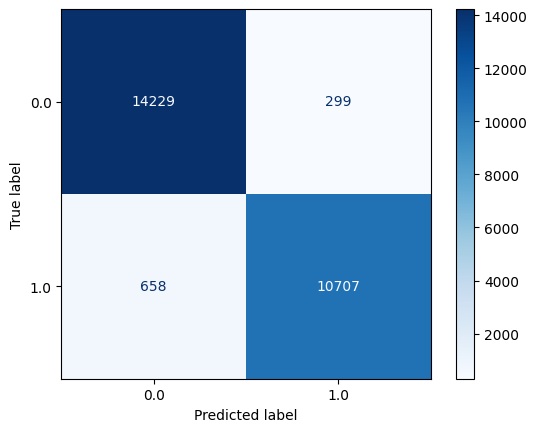

In [318]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap=plt.cm.Blues)

## **6.6 Подбор гиперпараметров для случайного леса**

### **6.6.1 Подбор параметра max_depth**

Для начала попробуем подобрать такой параметр, как max_depth. Это параметр означает максимальную глубину деревьев.

In [287]:
max_depths = [x for x in range(10,110,10)]
test_err = []
test_acc = []
train_err = []
train_acc = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

In [288]:
rf = RandomForestClassifier(max_depth=None)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
train_err.append(np.mean(y_train != y_train_pred))
train_acc.append(accuracy_score(y_train, y_train_pred))
test_err.append(np.mean(y_test != y_test_pred))
test_acc.append(accuracy_score(y_test, y_test_pred))

In [289]:
max_depths.append(110)

Построим график зависимости ошибки от параметра max_depth

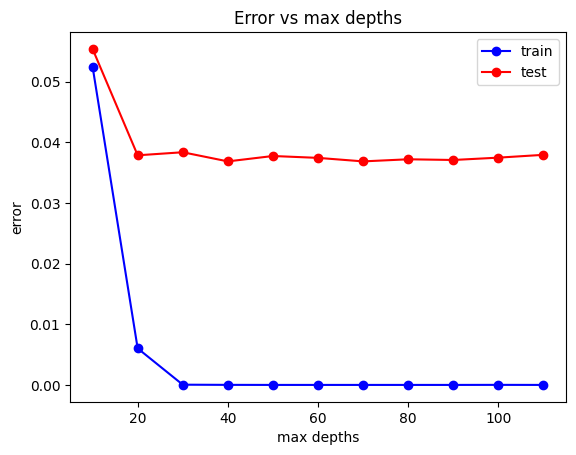

In [290]:
fig, ax = plt.subplots()

ax.plot(max_depths, train_err, 'b-o', label = 'train')
ax.plot(max_depths, test_err, 'r-o', label = 'test')
ax.set_title('Error vs max depths')
ax.set_xlabel('max depths')
ax.set_ylabel('error')
ax.legend()
plt.show()

Из графика можно заметить, что ошибка на тестовой выборке при увеличении max_depth больше, чем на тренировочной. Следовательно у нас переобучение

Построим график зависимости accuracy от параметра max_depth

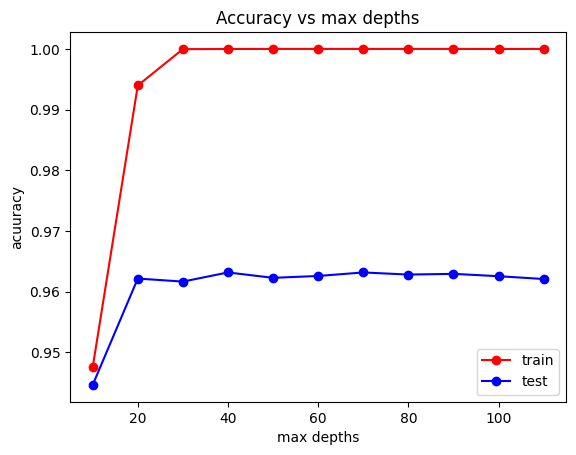

In [291]:
fig, ax = plt.subplots()

ax.plot(max_depths, train_acc, 'r-o', label = 'train')
ax.plot(max_depths, test_acc, 'b-o', label = 'test')
#ax.set_xlim([np.min(max_depths), np.max(max_depths)])
ax.set_title('Accuracy vs max depths')
ax.set_xlabel('max depths')
ax.set_ylabel('acuuracy')
ax.legend()
plt.show()

Мы наблюдаем, что с ростом параметра max_depth accuracy на тренировочной и тестовой выборке в начале увеличивается, а потом никак не изменяется

Минимальные значения ошибки:

In [292]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.03684393465415363


Максимальные значения accuracy:

In [293]:
max_train_acc = np.max(train_acc)
max_test_acc = np.max(test_acc)
print(max_train_acc, max_test_acc)

1.0 0.9631560653458464


Оптимальное значение параметра max_depth:

In [294]:
max_depth_opt = max_depths[test_err.index(min_test_err)]
print(max_depth_opt)

40


После экспериментов выше, стало интересно, а какой минимальный параметр max_depth можно выбрать так, чтобы ошибка при этом была как можно меньше?

In [295]:
max_depths = [x for x in range(2,21)]
test_err = []
test_acc = []
train_err = []
train_acc = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Построим график зависимости ошибки от параметра max_depth

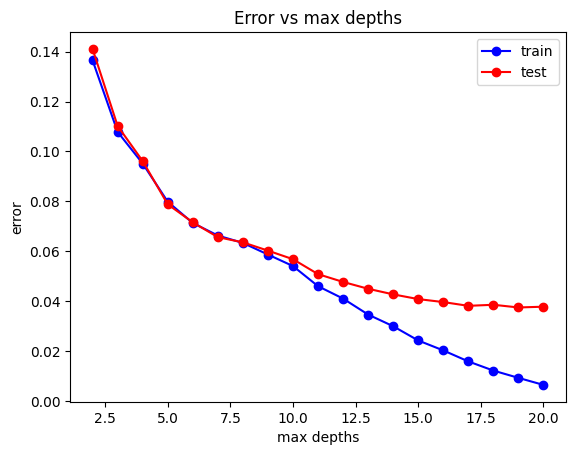

In [296]:
fig, ax = plt.subplots()

ax.plot(max_depths, train_err, 'b-o', label = 'train')
ax.plot(max_depths, test_err, 'r-o', label = 'test')
ax.set_title('Error vs max depths')
ax.set_xlabel('max depths')
ax.set_ylabel('error')
ax.legend()
plt.show()

Мы получили, что сначала, с увеличением параметра max_depth, ошибка на тестовой и тренировочной выборке уменьшалась. Потом же, ошибка на тестовой выборке стала больше, чем на тренировочной, что говорит о переобучении

Построим график зависимости accuracy от параметра max_depth

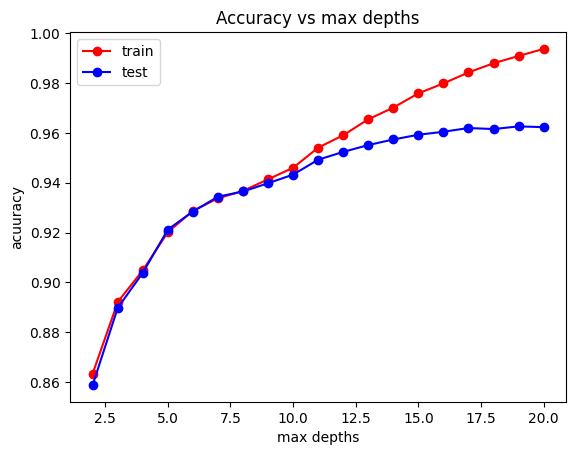

In [297]:
fig, ax = plt.subplots()

ax.plot(max_depths, train_acc, 'r-o', label = 'train')
ax.plot(max_depths, test_acc, 'b-o', label = 'test')
#ax.set_xlim([np.min(max_depths), np.max(max_depths)])
ax.set_title('Accuracy vs max depths')
ax.set_xlabel('max depths')
ax.set_ylabel('acuuracy')
ax.legend()
plt.show()

Мы наблюдаем, что до определённого момента, с ростом параметра max_depth, accuracy на тренировочной и тестовой выборке увеличивается, но после, accuracy на тренировочной выборке становится больше, чем на тестовой.

Минимальные значения ошибки:

In [298]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.006371025348958434 0.03742324180280385


Максимальные значения accuracy:

In [299]:
max_train_acc = np.max(train_acc)
max_test_acc = np.max(test_acc)
print(max_train_acc, max_test_acc)

0.9936289746510416 0.9625767581971961


Оптимальное значение параметра max_depth:

In [300]:
max_depth_opt = max_depths[test_err.index(min_test_err)]
print(max_depth_opt)

19


In [301]:
res_table.loc[len(res_table)] = (f'RandomForestClassifier max_depth {max_depth_opt}', test_acc[max_depths.index(max_depth_opt)])


### **6.6.2 Подбор параметра n_estimators**

Теперь попробуем подобрать параметр n_estimators, который обозначает количество деревьев в лесу

In [302]:
n_estimators_list = [x for x in range(100, 2200, 200)]
test_err_n = []
test_acc_n = []
train_err_n = []
train_acc_n = []
for n_estimators in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err_n.append(np.mean(y_train != y_train_pred))
    train_acc_n.append(accuracy_score(y_train, y_train_pred))
    test_err_n.append(np.mean(y_test != y_test_pred))
    test_acc_n.append(accuracy_score(y_test, y_test_pred))

Построим график зависимости ошибки от параметра n_estimators

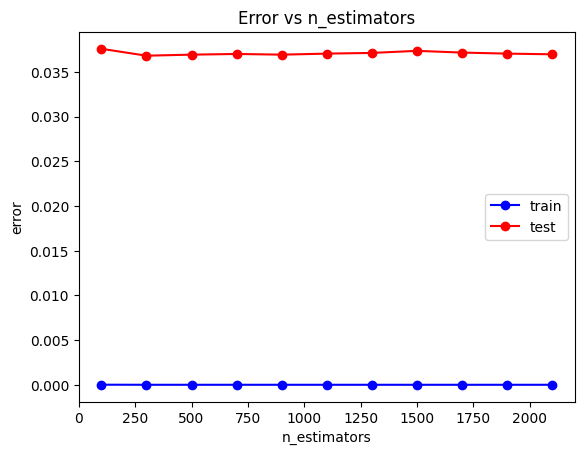

In [303]:
fig, ax = plt.subplots()

ax.plot(n_estimators_list, train_err_n, 'b-o', label = 'train')
ax.plot(n_estimators_list, test_err_n, 'r-o', label = 'test')
#ax.set_xlim([np.min(max_depths), np.max(max_depths)])
ax.set_title('Error vs n_estimators')
ax.set_xlabel('n_estimators')
ax.set_ylabel('error')
ax.legend()
plt.show()

Из графика можно заметить, что ошибка на тестовой выборке всегда больше, чем на тренировочной. Следовательно, у нас переобучение, на которое не влияет параметр n_estimators

Построим график зависимости accuracy от параметра n_estimators

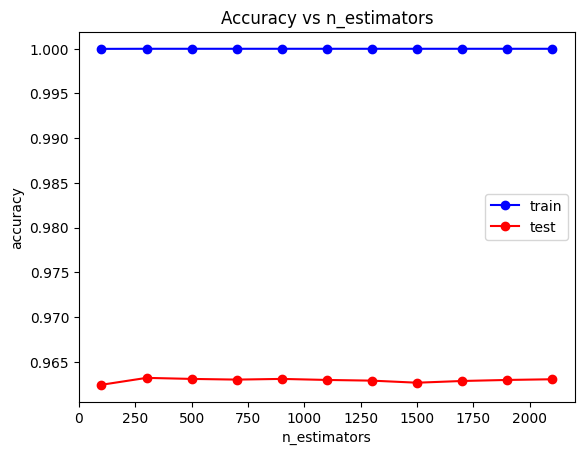

In [304]:
fig, ax = plt.subplots()

ax.plot(n_estimators_list, train_acc_n, 'b-o', label = 'train')
ax.plot(n_estimators_list, test_acc_n, 'r-o', label = 'test')
#ax.set_xlim([np.min(max_depths), np.max(max_depths)])
ax.set_title('Accuracy vs n_estimators')
ax.set_xlabel('n_estimators')
ax.set_ylabel('accuracy')
ax.legend()
plt.show()

Мы наблюдаем, что с ростом параметра n_estimators accuracy почти никак не изменяется.

Минимальные значения ошибки:

In [305]:
min_train_err_n = np.min(train_err_n)
min_test_err_n = np.min(test_err_n)
print(min_train_err_n, min_test_err_n)

0.0 0.03680531417757695


Максимальные значения accuracy:

In [306]:
max_train_acc_n = np.max(train_acc_n)
max_test_acc_n = np.max(test_acc_n)
print(max_train_acc_n, max_test_acc_n)

1.0 0.9631946858224231


Оптимальное значение параметра n_estimators:

In [307]:
n_estimators_opt = n_estimators_list[test_err_n.index(min_test_err_n)]
print(n_estimators_opt)

300


In [308]:
res_table.loc[len(res_table)] = (f'RandomForestClassifier n_estimators {n_estimators_opt}', test_acc_n[n_estimators_list.index(n_estimators_opt)])


# **7. Вывод**

In [319]:
res_table


,Model,Accuracy
0,KNeighborsClassifier standart,0.928127
1,KNeighborsClassifier n=7,0.929093
2,KNeighborsClassifier n=11,0.928784
3,LogisticRegression standart,0.871587
4,RandomForestClassifier standart,0.963002
5,GradientBoostingClassifier standart,0.942301
6,MLPClassifier,0.959757
7,RandomForestClassifier max_depth 19,0.962577
8,RandomForestClassifier n_estimators 300,0.963195


Можно сделать вывод, что лучшим, из использованных методов машинного обучения, для данной задачи оказался "Случайный лес" с подобранным гиперпараметром n_estimators = 300. Этот метод с подобранным гиперпараметром дал accuracy = 0.963.

Таким образом предобработка данных была выполнена успешно и задача классификации решена.